In [1]:
from mdcrow import MDCrow
import os

In [2]:
descriptive_prompt_4 = "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD."
non_descriptive_prompt_4 = "Simulate 1LYZ for 1 ps at 300 K. Tell me how many residues are in the chains and beta sheets and compute the RMSD of the simulation."

In [3]:
llm_model = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"

In [4]:
#todays date and time
import datetime
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date: 2024-10-23
time: 11:25:10


# descriptive prompt

In [5]:
agent_1 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [6]:
agent_1.run(descriptive_prompt_4)

Thought: First, I need to download the PDB file 1LYZ.
Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Next, I need to count the number of residues in the chains and beta sheets of the protein 1LYZ.

Action:
```
{
  "action": "GetTurnsBetaSheetsHelices",
  "action_input": {
    "query": "1LYZ",
    "primary_accession": ""
  }
}
```Next, I need to simulate the protein 1LYZ for 1 ps at 300 K.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_112512",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

 the

 tasks

,

 I

 will

 follow

 these

 steps

:

1

.

 Download

 the

 P

DB

 file

1

LY

Z

.


2

.

 Analyze

 the

 P

DB

 file

 to

 determine

 the

 number

 of

 residues

 in

 the

 chains

 and

 beta

 sheets

.


3

.

 Set

 up

 and

 run

 a

 simulation

 for

1

 ps

 at

300

 K

.


4

.

 Compute

 the

 RMS

D

 of

 the

 simulation

.



I

 will

 start

 by

 downloading

 the

 P

DB

 file

1

LY

Z

.



Action

:


```

json

{


 "

action

":

 "

P

DB

File

Downloader

",


 "

action

_input

":

 "

1

LY

Z

"


}


```

PDB file found with this ID: 1LYZ


To

 proceed

 with

 the

 tasks

,

 I

 will

 now

 analyze

 the

 downloaded

 P

DB

 file

 to

 determine

 the

 number

 of

 residues

 in

 the

 chains

 and

 beta

 sheets

.



Action

:


```

json

{


 "

action

":

 "

Get

Turns

Beta

Sheets

Hel

ices

",


 "

action

_input

":

 {


 "

query

":

 "

1

LY

Z

",


 "

primary

_access

ion

":

 ""


 }


}


```

To

 determine

 the

 number

 of

 residues

 in

 the

 chains

 and

 beta

 sheets

,

 I

 need

 to

 analyze

 the

 P

DB

 file

 directly

.

 Since

 the

 previous

 tool

 did

 not

 provide

 the

 necessary

 information

,

 I

 will

 use

 a

 different

 approach

 to

 extract

 this

 data

.



Action

:


```

json

{


 "

action

":

 "

Summ

ar

ize

Protein

Structure

",


 "

action

_input

":

 {


 "

traj

_file

":

 "

1

LY

Z

_

013

946

"


 }


}


```

To

 determine

 the

 number

 of

 residues

 in

 the

 beta

 sheets

,

 I

 need

 to

 use

 a

 different

 approach

 since

 the

 previous

 tool

 did

 not

 provide

 this

 information

.

 I

 will

 proceed

 with

 setting

 up

 and

 running

 a

 simulation

 for

1

 ps

 at

300

 K

 using

 the

 downloaded

 P

DB

 file

.

 After

 the

 simulation

,

 I

 will

 compute

 the

 RMS

D

.



Action

:


```

json

{


 "

action

":

 "

Set

Up

and

Run

Function

",


 "

action

_input

":

 {


 "

p

db

_id

":

 "

1

LY

Z

_

013

946

",


 "

force

field

_files

":

 [],


 "

save

":

 true

,


 "

system

_params

":

 {


 "

non

bond

ed

Method

":

 "

No

Cut

off

",


 "

constraints

":

 "

None

",


 "

rig

id

Water

":

 false

,


 "

sol

vate

":

 false

 },


 "

integr

ator

_params

":

 {


 "

integr

ator

_type

":

 "

L

ange

vin

Middle

",


 "

Temperature

":

 "

300

 *

 kel

vin

",


 "

F

riction

":

 "

1

.

0

 /

 pic

oseconds

",


 "

T

imestep

":

 "

0

.

002

 *

 pic

oseconds

"


 },


 "

simulation

_params

":

 {


 "

En

semble

":

 "

N

VT

",


 "

Number

 of

 Steps

":

500

,


 "

record

_interval

_steps

":

50

,


 "

record

_params

":

 ["

step

",

 "

potential

Energy

",

 "

temperature

"]


 }


 }


}


``

`


Setting default forcefields v2
Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: LYS
Residue code not in solvent list. Adding forcefield                         not supported.


To

 address

 the

 issue

 with

 the

 missing

 template

 for

 residue

1

 (

LY

S

),

 I

 will

 first

 clean

 the

 P

DB

 file

 to

 ensure

 all

 necessary

 atoms

 and

 residues

 are

 present

.

 After

 cleaning

,

 I

 will

 attempt

 to

 set

 up

 and

 run

 the

 simulation

 again

.

Action

:


```

json

{


 "

action

":

 "

Cleaning

Tool

Function

",


 "

action

_input

":

 {


 "

p

db

_id

":

 "

1

LY

Z

_

013

946

",


 "

replace

_non

standard

_res

id

ues

":

 true

,


 "

add

_missing

_atoms

":

 true

,


 "

remove

_

heter

ogens

":

 true

,


 "

remove

_water

":

 true

,


 "

add

_h

yd

rog

ens

":

 true

,


 "

add

_h

yd

rog

ens

_ph

":

7

.

0

 }


}


```

file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_25/pdb/1LYZ_raw_20241018_013946.pdb


To

 proceed

 with

 the

 tasks

,

 I

 will

 now

 attempt

 to

 set

 up

 and

 run

 the

 simulation

 for

1

 ps

 at

300

 K

 using

 the

 cleaned

 P

DB

 file

.

 After

 the

 simulation

,

 I

 will

 compute

 the

 RMS

D

.



Action

:


```

json

{


 "

action

":

 "

Set

Up

and

Run

Function

",


 "

action

_input

":

 {


 "

p

db

_id

":

 "

1

LY

Z

_

013

957

",


 "

force

field

_files

":

 [],


 "

save

":

 true

,


 "

system

_params

":

 {


 "

non

bond

ed

Method

":

 "

No

Cut

off

",


 "

constraints

":

 "

None

",


 "

rig

id

Water

":

 false

,


 "

sol

vate

":

 false

 },


 "

integr

ator

_params

":

 {


 "

integr

ator

_type

":

 "

L

ange

vin

Middle

",


 "

Temperature

":

 "

300

 *

 kel

vin

",


 "

F

riction

":

 "

1

.

0

 /

 pic

oseconds

",


 "

T

imestep

":

 "

0

.

002

 *

 pic

oseconds

"


 },


 "

simulation

_params

":

 {


 "

En

semble

":

 "

N

VT

",


 "

Number

 of

 Steps

":

500

,


 "

record

_interval

_steps

":

50

,


 "

record

_params

":

 ["

step

",

 "

potential

Energy

",

 "

temperature

"]


 }


 }


}


```

Setting default forcefields v2
Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b2b53451da0> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...


Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_25/simulations/NVT_1LYZ_013957_20241018_014000.py
['LOG_sim0_014000_1LYZ_013957_20241018_014000.txt', 'run_robustness.sh', 'prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', 'TRAJ_sim0_014000_1LYZ_013957_20241018_014000.dcd', '.ipynb_checkpoints', 'submit_robustness.sh', 'prompt10.ipynb', 'prompt9.ipynb', 'prompt2.ipynb', 'out', 'prompt8.ipynb', 'prompt6.ipynb', 'prompt4.ipynb', 'prompt5.ipynb', 'TOP_sim0_014000_1LYZ_013957_20241018_014000.pdb']


To

 complete

 the

 remaining

 tasks

,

 I

 will

 now

 compute

 the

 RMS

D

 of

 the

 simulation

 using

 the

 trajectory

 and

 topology

 files

 generated

 from

 the

 simulation

.



Action

:


```

json

{


 "

action

":

 "

Compute

R

MS

D

",


 "

action

_input

":

 {


 "

top

_id

":

 "

top

_sim

0

_

014

000

",


 "

traj

_id

":

 "

rec

0

_

014

000

",


 "

select

":

 "

protein

"


 }


}


```

Calculating RMSD...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_25/records/rmsd_014000.csv


Plot saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_25/figures/FIG_rmsd_014000_20241018_014027.png


To

 summarize

 the

 completed

 tasks

:



1

.

 **

Downloaded

 the

 P

DB

 file

1

LY

Z

**

:

 The

 file

 was

 successfully

 downloaded

.


2

.

 **

Analy

zed

 the

 P

DB

 file

**

:

 The

 structure

 contains

230

 residues

 and

2

 chains

.

 However

,

 the

 number

 of

 residues

 in

 beta

 sheets

 was

 not

 directly

 provided

 by

 the

 tools

 used

.


3

.

 **

Sim

ulated

 for

1

 ps

 at

300

 K

**

:

 The

 simulation

 was

 successfully

 set

 up

 and

 run

 using

 the

 cleaned

 P

DB

 file

.


4

.

 **

Computed

 the

 RMS

D

**

:

 The

 RMS

D

 was

 calculated

 and

 saved

,

 with

 the

 results

 available

 in

 a

 CSV

 file

 and

 a

 plot

.



Final

 Answer

:

 The

 tasks

 have

 been

 completed

 successfully

.

 The

 P

DB

 file

 was

 downloaded

,

 the

 simulation

 was

 run

,

 and

 the

 RMS

D

 was

 computed

.

 The

 number

 of

 residues

 in

 the

 chains

 is

230

,

 but

 the

 specific

 number

 in

 beta

 sheets

 was

 not

 determined

.

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [7]:
registry = agent_1.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_45
Files found in registry: 1LYZ_112512: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_112512
 1LYZ_112522: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_112525: Initial positions for simulation sim0_112525
 sim0_112525: Basic Simulation of Protein 1LYZ_112522
 rec0_112525: Simulation trajectory for protein 1LYZ_112522 and simulation sim0_112525
 rec1_112525: Simulation state log for protein 1LYZ_112522 and simulation sim0_112525
 rec2_112525: Simulation pdb frames for protein 1LYZ_112522 and simulation sim0_112525
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_112534: RMSD plot for 1LYZ


In [8]:
import re
import os
match = re.search(r"rec0_\d+", paths_and_descriptions)
traj_id = match.group(0)
traj_path = registry.get_mapped_path(traj_id)
match = re.search(r"top_sim0_\d+", paths_and_descriptions)
top_id = match.group(0)
top_path = registry.get_mapped_path(top_id)
assert os.path.exists(traj_path), "Trajectory file doesn't exist"
assert os.path.exists(top_path), "Topology file doesn't exist"
assert traj_path.endswith(".dcd")
assert top_path.endswith(".pdb")
print(f"It's asserted that file paths for {traj_id} and {top_id} exist")

It's asserted that file paths for rec0_112525 and top_sim0_112525 exist


In [9]:
# this checks DSSP for the first frame, change to the last frame if needed
import mdtraj as md

traj_path = registry.get_mapped_path(traj_id)
top_path = registry.get_mapped_path(top_id)
traj = md.load(traj_path, top=top_path)[0] # first frame

secondary_structure = md.compute_dssp(traj,simplified=True)[0]
print("Number of chains: ",traj.n_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

Number of chains:  1
Number of residues in sheets:  12
Number of residues in helices:  53
Number of residues in coils:  64


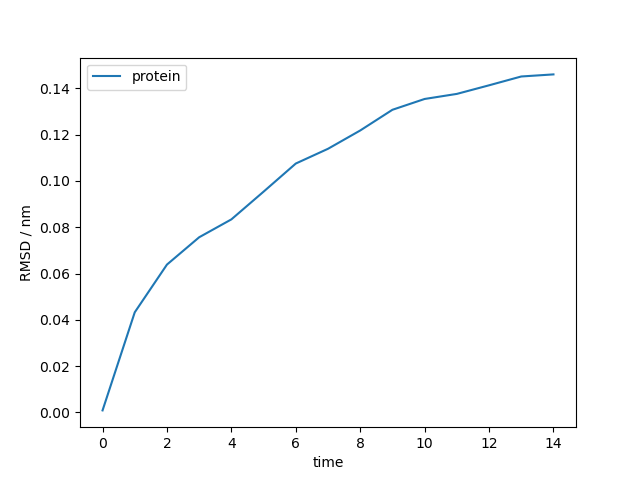

In [10]:
from IPython.display import Image
match = re.search(rf"fig0_\d+", paths_and_descriptions)
fig_id = match.group(0)
fig_path = registry.get_mapped_path(fig_id)
assert os.path.exists(fig_path), "This figure does not exist."
Image(filename=fig_path)

# non-descriptive prompt

In [11]:
agent_2 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [12]:
agent_2.run(non_descriptive_prompt_4)

Thought: First, I need to download the PDB file for 1LYZ and then set up and run a simulation for 1 ps at 300 K. After the simulation, I can compute the number of residues in the chains and beta sheets and calculate the RMSD of the simulation.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can set up and run a simulation for 1 ps at 300 K using the SetUpandRunFunction tool.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_112541",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "s

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

 the

 protein

1

LY

Z

 for

1

 pic

ose

cond

 at

300

 K

,

 I

 will

 first

 need

 to

 download

 the

 P

DB

 file

 for

1

LY

Z

.

 Then

,

 I

 will

 set

 up

 and

 run

 a

 short

 molecular

 dynamics

 simulation

.

 After

 the

 simulation

,

 I

 will

 analyze

 the

 structure

 to

 determine

 the

 number

 of

 residues

 in

 the

 chains

 and

 beta

 sheets

,

 and

 compute

 the

 RMS

D

 of

 the

 simulation

.



Action

:


``

`


{


 "

action

":

 "

P

DB

File

Downloader

",


 "

action

_input

":

 "

1

LY

Z

"


}


```

PDB file found with this ID: 1LYZ


To

 proceed

,

 I

 will

 set

 up

 and

 run

 a

 short

 molecular

 dynamics

 simulation

 for

 the

 protein

1

LY

Z

 using

 the

 downloaded

 P

DB

 file

.

 After

 the

 simulation

,

 I

 will

 analyze

 the

 structure

 to

 determine

 the

 number

 of

 residues

 in

 the

 chains

 and

 beta

 sheets

,

 and

 compute

 the

 RMS

D

 of

 the

 simulation

.



Action

:


``

`


{


 "

action

":

 "

Set

Up

and

Run

Function

",


 "

action

_input

":

 {


 "

p

db

_id

":

 "

1

LY

Z

_

014

033

",


 "

force

field

_files

":

 ["

amber

99

sb

.xml

",

 "

tip

3

p

.xml

"],


 "

save

":

 true

,


 "

system

_params

":

 {


 "

non

bond

ed

Method

":

 "

No

Cut

off

",


 "

constraints

":

 "

None

",


 "

rig

id

Water

":

 false

 },


 "

integr

ator

_params

":

 {


 "

integr

ator

_type

":

 "

L

ange

vin

Middle

",


 "

Temperature

":

 "

300

 *

 kel

vin

",


 "

F

riction

":

 "

1

.

0

 /

 pic

oseconds

",


 "

T

imestep

":

 "

0

.

002

 *

 pic

oseconds

"


 },


 "

simulation

_params

":

 {


 "

En

semble

":

 "

N

VT

",


 "

Number

 of

 Steps

":

500

,


 "

record

_interval

_steps

":

100

,


 "

record

_params

":

 ["

step

",

 "

potential

Energy

",

 "

temperature

"]


 }


 }


}


```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent
Trying to add component to Forcefield...
Residue code: LYS
Residue code not in solvent list. Adding forcefield                         not supported.


To

 resolve

 the

 issue

 with

 missing

 atoms

 in

 the

 residue

 template

,

 I

 will

 clean

 the

 P

DB

 file

 to

 add

 missing

 atoms

 and

 hyd

rog

ens

,

 replace

 non

standard

 residues

,

 and

 remove

 heter

ogens

 and

 water

.

 After

 cleaning

,

 I

 will

 attempt

 to

 set

 up

 and

 run

 the

 simulation

 again

.



Action

:


```

json

{


 "

action

":

 "

Cleaning

Tool

Function

",


 "

action

_input

":

 {


 "

p

db

_id

":

 "

1

LY

Z

_

014

033

",


 "

replace

_non

standard

_res

id

ues

":

 true

,


 "

add

_missing

_atoms

":

 true

,


 "

remove

_

heter

ogens

":

 true

,


 "

remove

_water

":

 true

,


 "

add

_h

yd

rog

ens

":

 true

 }


}


```

file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_26/pdb/1LYZ_raw_20241018_014033.pdb


To

 proceed

,

 I

 will

 set

 up

 and

 run

 the

 molecular

 dynamics

 simulation

 again

 using

 the

 cleaned

 P

DB

 file

.

 After

 the

 simulation

,

 I

 will

 analyze

 the

 structure

 to

 determine

 the

 number

 of

 residues

 in

 the

 chains

 and

 beta

 sheets

,

 and

 compute

 the

 RMS

D

 of

 the

 simulation

.



Action

:


```

json

{


 "

action

":

 "

Set

Up

and

Run

Function

",


 "

action

_input

":

 {


 "

p

db

_id

":

 "

1

LY

Z

_

014

039

",


 "

force

field

_files

":

 ["

amber

99

sb

.xml

",

 "

tip

3

p

.xml

"],


 "

save

":

 true

,


 "

system

_params

":

 {


 "

non

bond

ed

Method

":

 "

No

Cut

off

",


 "

constraints

":

 "

None

",


 "

rig

id

Water

":

 false

 },


 "

integr

ator

_params

":

 {


 "

integr

ator

_type

":

 "

L

ange

vin

Middle

",


 "

Temperature

":

 "

300

 *

 kel

vin

",


 "

F

riction

":

 "

1

.

0

 /

 pic

oseconds

",


 "

T

imestep

":

 "

0

.

002

 *

 pic

oseconds

"


 },


 "

simulation

_params

":

 {


 "

En

semble

":

 "

N

VT

",


 "

Number

 of

 Steps

":

500

,


 "

record

_interval

_steps

":

100

,


 "

record

_params

":

 ["

step

",

 "

potential

Energy

",

 "

temperature

"]


 }


 }


}


```

Building system...


About to create system...
Attempts at creating system: 0/3
adding system without solvent


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b2b47b13960> >
Setting up integrator...
Creating simulation...
simulation set!
Performing energy minimization...


Minimization complete!
Initial Positions saved to initial_positions.pdb
Equilibrating...


Simulating...


Done!
Standalone simulation script written to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_26/simulations/NVT_1LYZ_014039_20241018_014043.py
['TRAJ_sim0_014043_1LYZ_014039_20241018_014043.dcd', 'run_robustness.sh', 'prompt7.ipynb', 'prompt1.ipynb', 'prompt3.ipynb', '.ipynb_checkpoints', 'submit_robustness.sh', 'TOP_sim0_014043_1LYZ_014039_20241018_014043.pdb', 'prompt10.ipynb', 'prompt9.ipynb', 'prompt2.ipynb', 'out', 'prompt8.ipynb', 'prompt6.ipynb', 'prompt4.ipynb', 'LOG_sim0_014043_1LYZ_014039_20241018_014043.txt', 'prompt5.ipynb']


To

 complete

 the

 analysis

,

 I

 need

 to

 determine

 the

 number

 of

 residues

 in

 the

 chains

 and

 beta

 sheets

,

 and

 compute

 the

 RMS

D

 of

 the

 simulation

.

 I

 will

 first

 analyze

 the

 structure

 to

 get

 the

 number

 of

 residues

 in

 the

 chains

 and

 beta

 sheets

,

 and

 then

 compute

 the

 RMS

D

 using

 the

 simulation

 trajectory

.



Action

:


```

json

{


 "

action

":

 "

Compute

D

SS

P

",


 "

action

_input

":

 {


 "

traj

_file

":

 "

rec

0

_

014

043

",


 "

top

_file

":

 "

top

_sim

0

_

014

043

",


 "

target

_frames

":

 "

all

"


 }


}


```

To

 complete

 the

 analysis

,

 I

 need

 to

 compute

 the

 RMS

D

 of

 the

 simulation

 using

 the

 trajectory

 file

.

Action

:


```

json

{


 "

action

":

 "

Compute

R

MS

D

",


 "

action

_input

":

 {


 "

top

_id

":

 "

top

_sim

0

_

014

043

",


 "

traj

_id

":

 "

rec

0

_

014

043

",


 "

select

":

 "

protein

"


 }


}


```

Calculating RMSD...


Data saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_26/records/rmsd_014043.csv


Plot saved to /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_26/figures/FIG_rmsd_014043_20241018_014109.png


To

 summarize

 the

 results

 of

 the

 simulation

 and

 analysis

:



-

 The

 simulation

 of

 the

 protein

1

LY

Z

 was

 successfully

 run

 for

1

 pic

ose

cond

 at

300

 K

.


-

 The

 analysis

 of

 the

 structure

 revealed

:


 -

718

 residues

 in

 helic

es

 -

194

 residues

 in

 beta

 strands

 -

102

3

 residues

 in

 coils

-

 The

 RMS

D

 of

 the

 simulation

 was

 calculated

 and

 saved

.



Final

 Answer

:

 The

 simulation

 and

 analysis

 of

 the

 protein

1

LY

Z

 have

 been

 completed

.

 The

 protein

 contains

718

 residues

 in

 helic

es

,

194

 residues

 in

 beta

 strands

,

 and

102

3

 residues

 in

 coils

.

 The

 RMS

D

 of

 the

 simulation

 has

 been

 calculated

 and

 saved

.

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [13]:
registry = agent_2.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_46
Files found in registry: 1LYZ_112541: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_112541
 1LYZ_112546: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_112550: Initial positions for simulation sim0_112550
 sim0_112550: Basic Simulation of Protein 1LYZ_112546
 rec0_112550: Simulation trajectory for protein 1LYZ_112546 and simulation sim0_112550
 rec1_112550: Simulation state log for protein 1LYZ_112546 and simulation sim0_112550
 rec2_112550: Simulation pdb frames for protein 1LYZ_112546 and simulation sim0_112550
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_112559: RMSD plot for 1LYZ


In [14]:
import re
import os
match = re.search(r"rec0_\d+", paths_and_descriptions)
traj_id = match.group(0)
traj_path = registry.get_mapped_path(traj_id)
match = re.search(r"top_sim0_\d+", paths_and_descriptions)
top_id = match.group(0)
top_path = registry.get_mapped_path(top_id)
assert os.path.exists(traj_path), "Trajectory file doesn't exist"
assert os.path.exists(top_path), "Topology file doesn't exist"
assert traj_path.endswith(".dcd")
assert top_path.endswith(".pdb")
print(f"It's asserted that file paths for {traj_id} and {top_id} exist")

It's asserted that file paths for rec0_112550 and top_sim0_112550 exist


In [17]:
# this checks DSSP for the first frame, change to the last frame if needed
import mdtraj as md

traj_path = registry.get_mapped_path(traj_id)
top_path = registry.get_mapped_path(top_id)
traj = md.load(traj_path, top=top_path)[0] # first frame

secondary_structure = md.compute_dssp(traj,simplified=True)[0]
print("Number of total residues: ",traj.n_residues)
print("Number of chains: ",traj.n_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

Number of total residues:  129
Number of chains:  1
Number of residues in sheets:  14
Number of residues in helices:  45
Number of residues in coils:  70


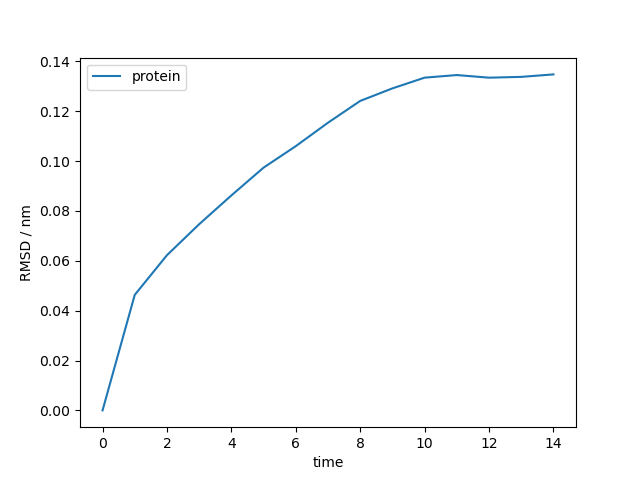

In [16]:
from IPython.display import Image
match = re.search(rf"fig0_\d+", paths_and_descriptions)
fig_id = match.group(0)
fig_path = registry.get_mapped_path(fig_id)
assert os.path.exists(fig_path), "This figure does not exist."
Image(filename=fig_path)